# Fitting Rotation Maps with Non-Keplerian Rotation

This notebook deals with dropping the Keplerian rotation assumption and assuming a more flexible power-law profile for the rotational velocity.

## Parameterization

In previous Notebooks we have assumed that the rotation was purely Keplerian, that is, 

$$v_0 = v_{\rm kep} \sin(i) \cos(\phi) + v_{\rm LSR},$$

where

$$v_{\rm kep} = \sqrt{\frac{GM_{\rm star}r^2}{(r^2 + z^2)^{3\,/\,2}}}.$$

It may be more appropriate to allow some flexibility in the velocity profile. In this notebook we consider a velocity profile given by,

$$v_0 = v_{\phi} \sin(i) \cos(\phi) + v_{\rm r} \sin(i) \sin(\phi) + v_{\rm LSR},$$

as discussed in [Teague et al. 2019](https://ui.adsabs.harvard.edu/abs/2019Natur.574..378T/abstract). Here, both the rotational velocity, $v_{\phi}$, and radial velocity, $v_{\rm r}$, are described by a power law profile,

$$v_i(r) = v_{i,\, 100} \times \left( \frac{r}{100~{\rm au}} \right)^{v_{i,\, q}} \quad \text{where} \quad i = \{\phi,\, r\}.$$

These are described by the parameters `vp_100`, `vp_q`, `vr_100` and `vr_q`, with `p` and `r` corresponding to $\phi$ and ${\rm r}$, respectively.

In [1]:
%matplotlib inline
from eddy.fit_cube import rotationmap

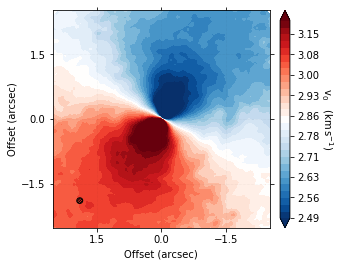

In [2]:
# Load up the data.

cube = rotationmap(path='../../cubes/TWHya_CO_cube_v0.fits',
                   uncertainty='../../cubes/TWHya_CO_cube_dv0.fits',
                   downsample=5, clip=2.5)

# Inspect the data.

cube.plot_data()

Assuming:
	p0 = [${\rm x0}$, ${\rm y0}$, ${\rm PA}$, ${\rm vp_100}$, ${\rm vp_q}$, ${\rm vlsr}$].


100%|██████████| 600/600 [06:19<00:00,  1.58it/s]


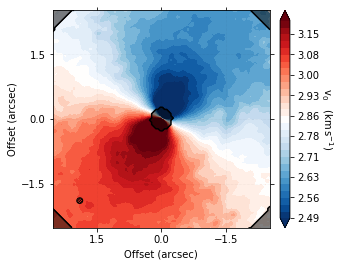

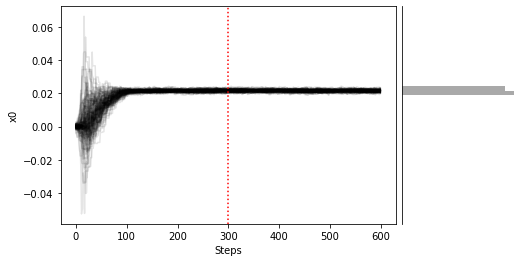

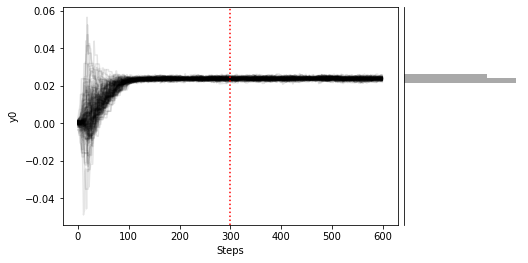

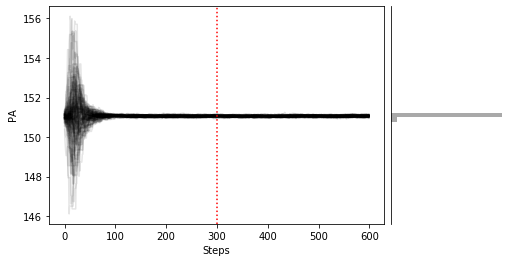

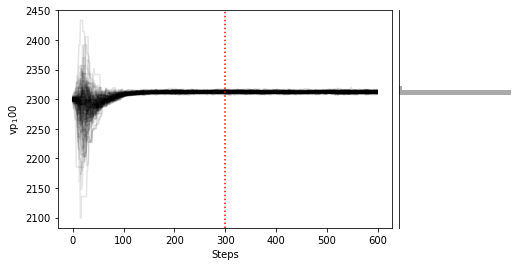

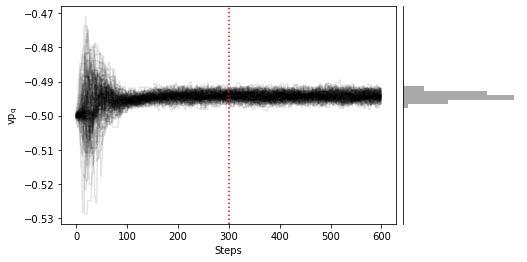

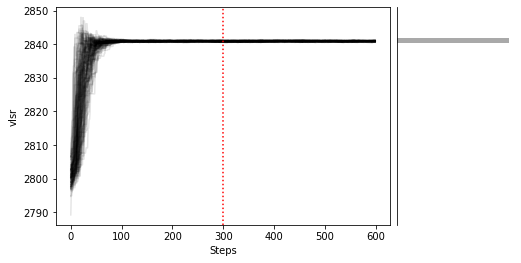

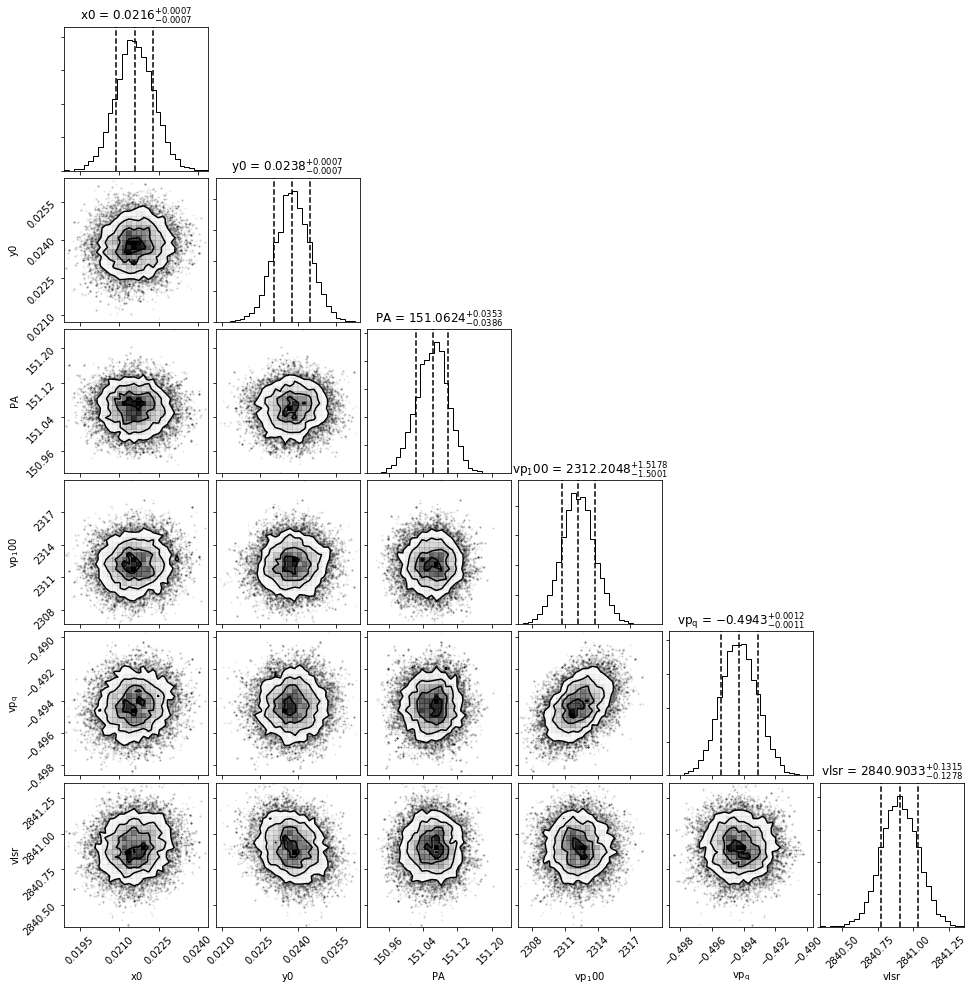

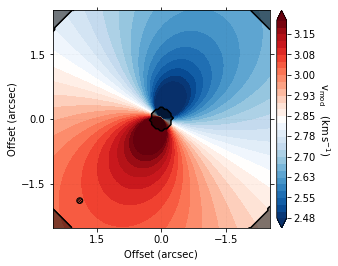

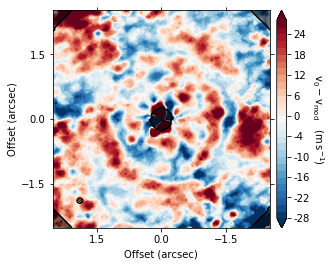

In [3]:
# Dictionary to contain the disk parameters.

params = {}

# Start with the positions of the free variables in p0.

params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['vp_100'] = 3
params['vp_q'] = 4
params['vlsr'] = 5

p0 = [0.0, 0.0, 151., 2.3e3, -0.5, 2.8e3]

# Fix the other parameters.

params['inc'] = 6.8     # degrees
params['dist'] = 60.1   # parsec
params['beam'] = False  # should we convolve the model? **MUST BE A BOOLEAN**

# We must also specify the region to fit as we do not want to fit outside the map.
# This can be done with the `r_min` and `r_max` values. An inner radius is sometimes
# useful if the beam smearing in the inner region strongly affects the fit.

r_min = 2.0 * cube.bmaj
r_max = 3.25

# Run the sampling.

samples = cube.fit_map(p0=p0, params=params, r_min=r_min, r_max=r_max,
                       nwalkers=128, nburnin=300, nsteps=300,
                       optimize=False)

Now we include the radial term. We start with all our radial velocities as zero.

Assuming:
	p0 = [${\rm x0}$, ${\rm y0}$, ${\rm PA}$, ${\rm vp_100}$, ${\rm vp_q}$, ${\rm vr_100}$, ${\rm vr_q}$, ${\rm vlsr}$].


100%|██████████| 2300/2300 [20:26<00:00,  1.88it/s]


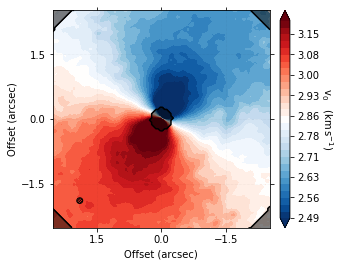

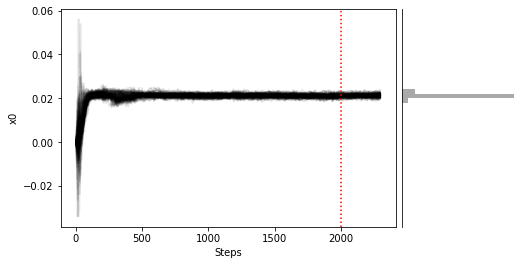

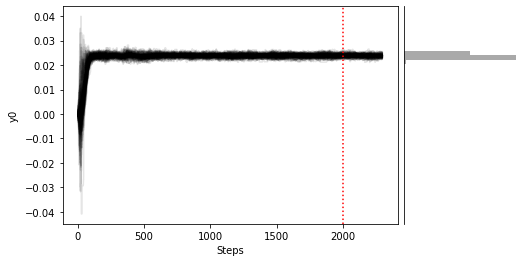

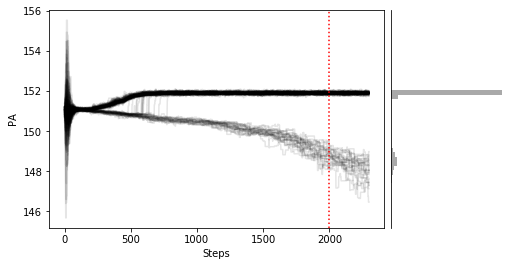

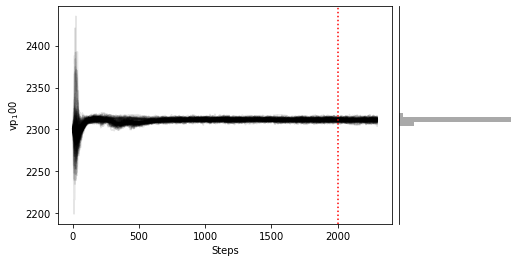

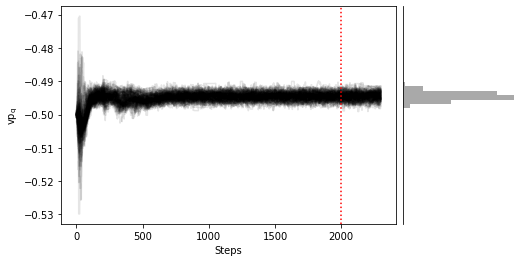

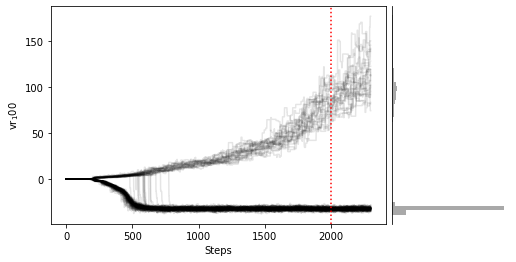

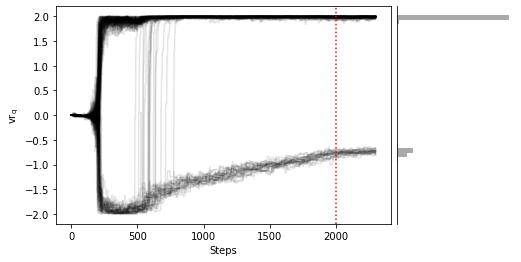

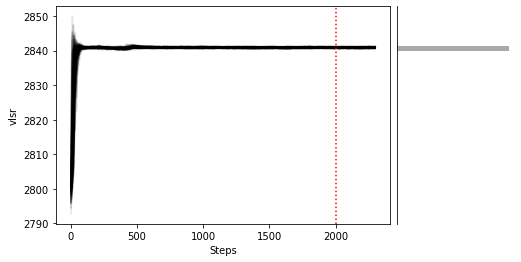

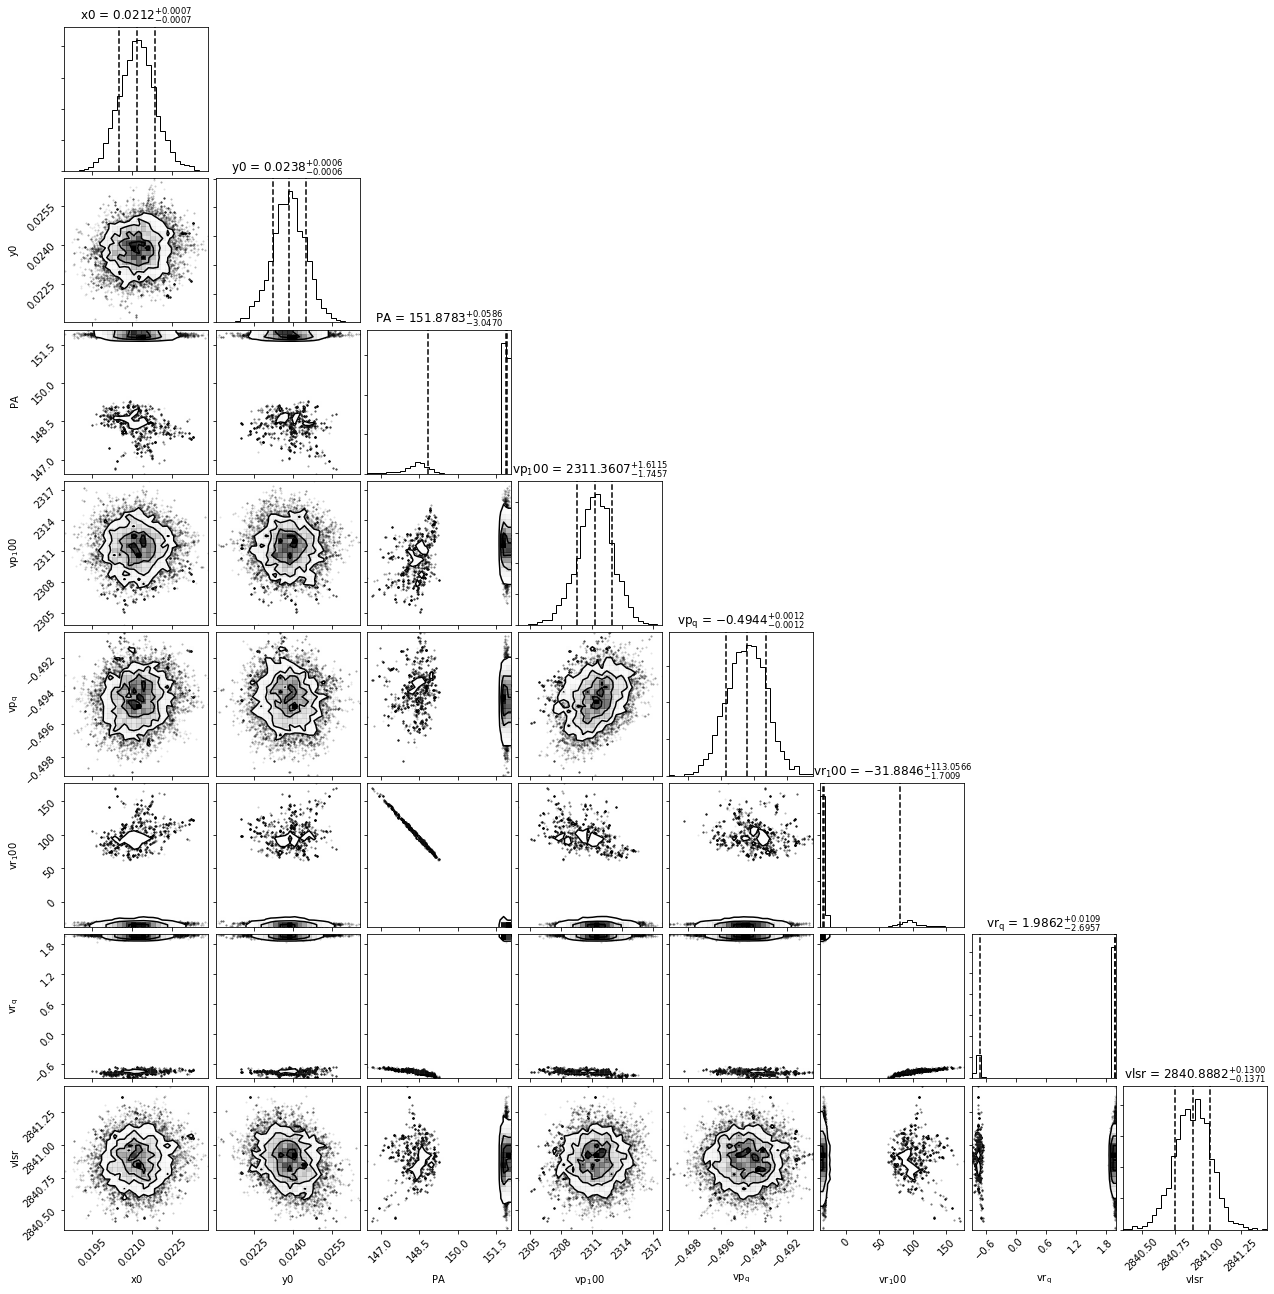

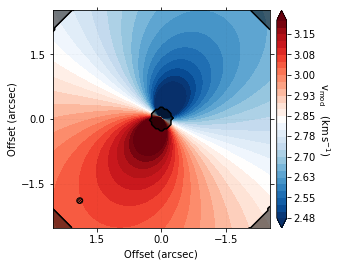

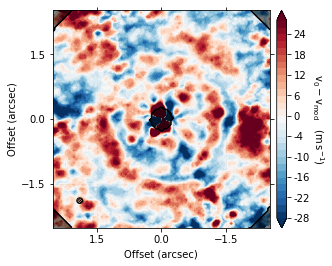

In [4]:
# Dictionary to contain the disk parameters.

params = {}

# Start with the positions of the free variables in p0.

params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['vp_100'] = 3
params['vp_q'] = 4
params['vr_100'] = 5
params['vr_q'] = 6
params['vlsr'] = 7

p0 = [0.0, 0.0, 151., 2.3e3, -0.5, 0.0, 0.0, 2.8e3]

# Fix the other parameters.

params['inc'] = 6.8     # degrees
params['dist'] = 60.1   # parsec
params['beam'] = False  # should we convolve the model? **MUST BE A BOOLEAN**

# We must also specify the region to fit as we do not want to fit outside the map.
# This can be done with the `r_min` and `r_max` values. An inner radius is sometimes
# useful if the beam smearing in the inner region strongly affects the fit.

r_min = 2.0 * cube.bmaj
r_max = 3.25

# Run the sampling.

samples = cube.fit_map(p0=p0, params=params, r_min=r_min, r_max=r_max,
                       nwalkers=128, nburnin=2000, nsteps=300,
                       optimize=False)

As with the warps, this is only meant to be an example and doesn't show any good constraints on $v_{\rm r}$.